# CRA Training Course: 
# Algorithms, Real Estate and the Potential To Identify Bias 

# Day 1



## Instructors (alpha order)
* Adam Gailey
* Tim Savage
* Peter Zorn



## Course Introduction and Overview
* The **purpose of this course** is to review a broad array of use cases in applying **algorithms** to examine issues of **fair lending** and the scrutiny that lenders face. 
* New analysts will be exposed to **hands-on examples** of data commonly seen in the industry. 
* Applications will be presented using the open-source **Python computing environment**, together with Jupyter notebooks as a **pedagogic tool**. 
* Analysts will gain real-world experience.
* The professors will emphasize ideas and techniques in deploying algorithms.
* Background theory, **if necessary**, will be provided during lectures.
* The **core learning outcome** from this course is to prepare you to:
    * develop fair-lending models using algorithms.
    * develop an understanding of the limitations any statistical analysis faces.
    * develop an understanding of the regulatory environment and the critical role of documentation.



## Python and the Anaconda Environment



### Python
* Python is an **object-oriented** program language that can be **used for statistical computing**.
    * Object oriented: OO



* Python is not itself a statistical computing program, **like Stata**.  It is a programming language, **like Matlab**.



* For **statistical computing**, you will **import libraries** that contain objects, such as the regression algorithm.



* The OO nature requires you to to take an action on the object using the syntax specified by the relevant library.



* Two examples:
    1. [statsmodels](https://www.statsmodels.org/stable/index.html) for regression-based algorithms using Pandas dataframes.
    2. [scikit-learn](https://scikit-learn.org/stable/) for machine learning algorithms using Numpy arrays.
    
    
    
* Typical example: load the libraries first.

In [1]:
import numpy as np  # Import the Numpy library and name it object "np"
import statsmodels.api as sm  # Import the Statsmodels library and name it object "sm"
import statsmodels.formula.api as smf  # Import the Formulas library of Statsmodels and name it object "smf"
import seaborn as sns  # A graphics library that improves the quality of graphs
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import warnings  # A library that stops the complaints
warnings.filterwarnings("ignore")

In [2]:
statadata = sm.datasets.webuse("auto")  # Grab the Stata dataset, mtcars
statadata.head()  # An action that lists the first five rows of data.  Note that Python indexes at 0. 

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic


#### Notes 
* **sm** is an object. 
* **datasets** is an object.
* **webuse** is an action.
* The **dataframe** that is an object called **statadata**.
* **head** is an action.

In [3]:
regress = smf.ols('price ~ mpg + headroom + weight', data=statadata).fit()
print(regress.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     11.09
Date:                Sat, 01 Jul 2023   Prob (F-statistic):           4.85e-06
Time:                        13:44:07   Log-Likelihood:                -681.33
No. Observations:                  74   AIC:                             1371.
Df Residuals:                      70   BIC:                             1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3158.3062   3617.449      0.873      0.3

#### Notes
* **smf** is an object.
* **ols** is an oject within smf that takes the arguments *formula* and *source data*.
* **fit** is an action.
* The results of the fit action are then put into an object, **regress**.
* **print** is technically a command in core Python that takes the input **regress.summary()**.
* **regress.summary()** is an object.action.
* **The dataset and output should look very familiar to anyone who has used Stata**.

### Anaconda
* Anaconda is a suite of development tools that use the Python programming language.



* Two specific Integrated Development Environments (IDES) are:
    * **Jupyter**
    * **Spyder**

### Spyder IDE
* It looks similar to R Studio, the most popular IDE that uses the R statistical computing language.

## Foundational Concepts in Model Development
* Scientific method:
    * Observation of the **natural world**.
    * Mathematical and/or statistical model to represent the **natural world**.
    * Experimentation to yield **observerations** or **data**.
    * Testing using data that results in refutation or further exploration.



* Economics as the application of science: model the process described by a theoretical model of economic activity.
    * Mathematical model of human behavior with conjectural variations called *theories* (but that are not theories in the scientific sense).
    * Statistical methods to address this: **natural experiments**.
        * A challenge is the data do not arise as a matter of experiment(s).
        * See the work of recent Nobel laureates: Angrist, Card and Imbens.
        * See the work of Judea Pearl and his "ladder of causation".
        * See Savage on the algorithmic counterfactual.



* The distinction between **statistical significance** and **economic significance**.
    * As $n \rightarrow \infty$, everything is **statistically significant** even if it did not play a role in the outcome.
    


* A model: $y = m \cdot x + b$, where $m$ is the slope and $b$ is the intercept (or bias).
    * In finance, for example, this is the **Capital Aseet Pricing Model**: $E(r_i)−r_f=\alpha + \beta \cdot \big(E(r_m)−r_f\big)$

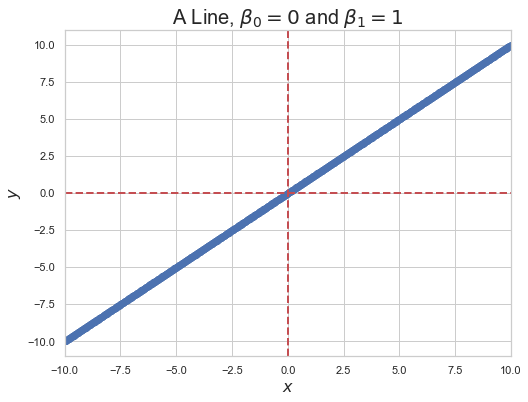

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 1000)
y = 0 + 1 * x

plt.figure(figsize = (8, 6))
plt.scatter(x=x, y=y)
plt.xlim(-10,10)
plt.title(r'A Line, $\beta_0=0$ and $\beta_1=1$', fontsize=20)
plt.xlabel(r'$x$', fontsize = 16)
plt.ylabel(r'$y$', fontsize = 16)
plt.axvline(0, color='r', ls='--', lw=2.0)
plt.axhline(0, color='r', ls='--', lw=2.0)

## What Is the Differrence Between Econometrics and Machine Learning?
> A distinction without a difference?



* Arguably, the **same application** of tools with different **use cases**.
    * Economists: the impact of intervention, such as **raising the minimum wage and its impact on employment**.
        * Does pollution **impact** residential property values, and if so by **how much**?
        * Does monetary policy **impact** commercial real estate values, and if so by **how much**?
        * Does rent control **impact** the quality of existing space, and if so by **how much**?
        * Does access to health insurance **impact** health outcomes, and if so by **how much**?
            * These generally create *point estimates* and *standard errors* of impacts.
    * Computer scientists: the probabilistic prediction of an unlabeled input, such as whether **this unlabeled email is spam with probrability 0.492**.
        * Can we teach a machine **to recognize accurately** hand-written digits?
        * Can we teach a machine **to generate accurately** prose?
    
    
    
> Economists use $\beta$'s and computer scientists use $\theta$'s.
    
    
    
* But we have learned many things from our friends in computer science, who often have much larger datasets to conquer.

### A Use Case in Fair Lending
* Economists typically study continous outcomes, such as **wages** or **interest rates**.



* With loan underwriting, we face a **two-class** problem:
    * **Issue or do not issue** a loan based on credit histories.
    * The loan either **performs** (and is repaid) or **defaults**.

## The Algorithm (Representation, Evaluation and Optimization)



### Representation

* $y = m \cdot x + b$: **a line**



* $y = f(\text{observed features})$: **a function** that may be linear or non-linear



* $y_i=\beta_0 + \beta_1 \cdot x_i + \epsilon_i$: **Bivariate linear regression**



* $E(r_i)-r_f = \alpha + \beta \cdot (E(r_m)-r_f) + \epsilon_i$: **Capital Asset Pricing Model** from finance



### Evaluation

* It depends on the use case.
    * The impact of increasing interest rates on cap rates: hypothesis testing using either classical or Bayesian inference.
    * Prediction: what is the likelihood (or probability) that AAPL is going up tomorrow?
    * Time-series forecast: mean-squared forecast error on an interest rate forecast.



### Optimization

* Machine-learning algorithms optimize an objective function.  
    * For example, least squares minimizes its objective function while the logit classifier maximizes its objective function.  
    * Objective functions may have **nice properties** that make optimization easy, but problems may arise when properties are not global.  (We lack closed-form proofs of global optima.)
    * There is a distinction between an algorithm (least squares) and a model (DCF).



* Let's examine a couple of optimization problems so that you have an idea of what's going on.

In [5]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

Populating the interactive namespace from numpy and matplotlib


### Example 1

$f(x1,x2)=−2x21−x22+x1+x2$

In [6]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = -2 * x1**2 - x2**2 + x1 + x2

Text(0.5, 0, '$f(x_1, x_2)$')

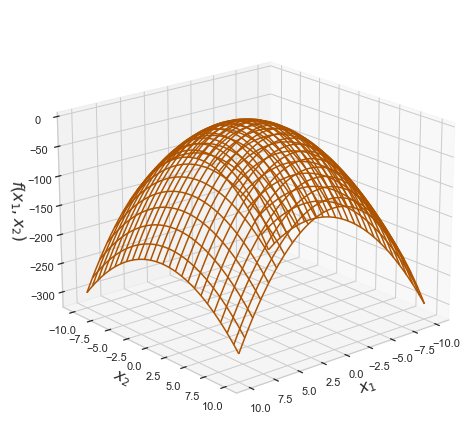

In [7]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [8]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(-2 * x1**2 - x2**2 + x1 + x2)

minimize(func, [-10.0, -10.0], args=(-1.0,), method='BFGS', options={'disp': True})

Optimization terminated successfully.
         Current function value: -0.375000
         Iterations: 8
         Function evaluations: 30
         Gradient evaluations: 10


      fun: -0.37499999999999917
 hess_inv: array([[0.25132329, 0.00137504],
       [0.00137504, 0.50142814]])
      jac: array([9.31322575e-08, 4.47034836e-08])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([0.25000002, 0.50000002])

### Example 2

$f(x_1,x_2)= - \sqrt{x_1^2+x_2^2}$

In [9]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = -1.0 * sqrt(x1**2 + x2**2)

Text(0.5, 0, '$f(x_1, x_2)$')

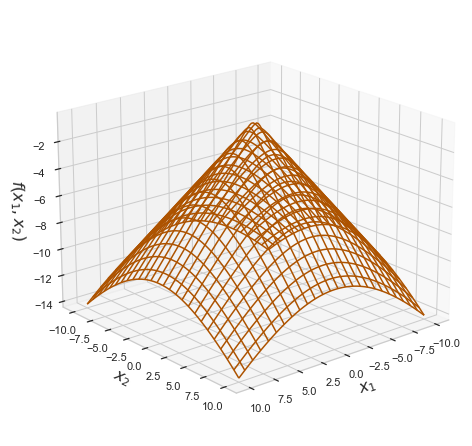

In [10]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_wireframe(x1, x2, f, rstride=4, cstride=4, color='#AD5300')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [11]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 318
         Gradient evaluations: 102


      fun: 4.77713366337017e-09
 hess_inv: array([[1.02649054e-08, 4.51063217e-10],
       [4.51063217e-10, 1.70570891e-08]])
      jac: array([0.36665749, 0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 318
      nit: 11
     njev: 102
   status: 2
  success: False
        x: array([-4.69736970e-09,  8.69323834e-10])

### Example 3

$f(x_1,x_2)=x_2^2-x_1^2$

In [12]:
x1 = linspace(-10, 10, 100)
x2 = linspace(-10, 10, 100)
x1, x2 = meshgrid(x1, x2)
f = x2**2 - x1**2

Text(0.5, 0, '$f(x_1, x_2)$')

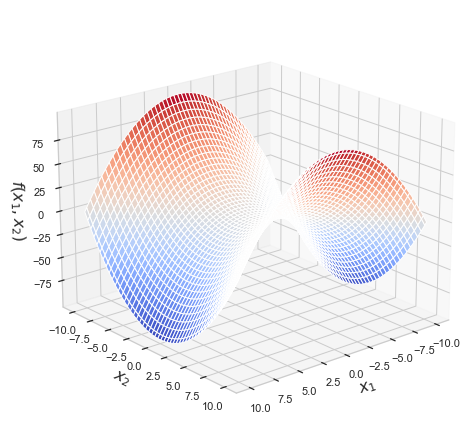

In [13]:
fig = plt.figure(figsize = (8, 6))
ax = Axes3D(fig)
ax.plot_surface(x1, x2, f, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
ax.view_init(20, 50)
ax.set_xlabel(r'$x_1$', fontsize = 16)
ax.set_ylabel(r'$x_2$', fontsize = 16)
ax.set_zlabel(r'$f(x_1, x_2)$', fontsize = 16)

In [14]:
def func(params, sign = 1.0):
    x1, x2 = params
    return sign*(sqrt(x1**2 + x2**2))

minimize(func, [-10.0, 10.0], args=(1.0,), method='BFGS', options={'disp': True})

         Current function value: 0.000000
         Iterations: 11
         Function evaluations: 318
         Gradient evaluations: 102


      fun: 4.77713366337017e-09
 hess_inv: array([[1.02649054e-08, 4.51063217e-10],
       [4.51063217e-10, 1.70570891e-08]])
      jac: array([0.36665749, 0.78370151])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 318
      nit: 11
     njev: 102
   status: 2
  success: False
        x: array([-4.69736970e-09,  8.69323834e-10])

## The Pandas Dataframe, Data Ingestion and Cleaning

### The Pandas Dataframe
* A Panda's dataframe is an **object** in Python that to the users looks like an Excel spreadsheet.
    * Because the dataframe is an object, you need to set aside your Stata vector thinking.
    * The dataframe is an object with elements within the object.
    * A Stata dataset is a series of vectors linked together.
    


* Pandas is capable of reading all standard file formats.
    * Excel
    * Stata
    * SAS
    * SPSS
    * flat text files
    * from the web itself
    
    
    
* The Statsmodels library uses Pandas DFs.



* The machine learning algorithms of scikit-learn uses numpy arrays, which are similar to Stata datasets.

In [15]:
import pandas as pd

In [16]:
sales03 = pd.read_excel("sales_si_03.xls", header=3, index_col=None)
sales03.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,7,,A5,4732 AMBOY ROAD,,...,1,0,1,3655,1110,2002,1,A5,365040,2003-03-05
1,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,8,,A5,4730 AMBOY ROAD,,...,1,0,1,3149,1110,2002,1,A5,353886,2003-01-13
2,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,12,,A5,4718 AMBOY ROAD,,...,1,0,1,1746,1110,2002,1,A5,310000,2003-07-25
3,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,13,,A5,4716 AMBOY ROAD,,...,1,0,1,1871,1110,2002,1,A5,299130,2003-09-05
4,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,15,,A5,4714 AMBOY ROAD,,...,1,0,1,4678,1110,2002,1,A5,304099,2003-09-19


In [17]:
sales03 = pd.read_excel("sales_si_03.xls", header=3, index_col=None)
sales04 = pd.read_excel("sales_si_04.xls", header=3, index_col=None)
sales05 = pd.read_excel("sales_si_05.xls", header=3, index_col=None)
sales06 = pd.read_excel("sales_si_06.xls", header=3, index_col=None)
sales = pd.concat([sales03, sales04, sales05, sales06])
sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,7,,A5,4732 AMBOY ROAD,,...,1,0,1,3655,1110,2002,1,A5,365040,2003-03-05
1,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,8,,A5,4730 AMBOY ROAD,,...,1,0,1,3149,1110,2002,1,A5,353886,2003-01-13
2,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,12,,A5,4718 AMBOY ROAD,,...,1,0,1,1746,1110,2002,1,A5,310000,2003-07-25
3,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,13,,A5,4716 AMBOY ROAD,,...,1,0,1,1871,1110,2002,1,A5,299130,2003-09-05
4,5,ANNADALE,01 ONE FAMILY HOMES,1,5391,15,,A5,4714 AMBOY ROAD,,...,1,0,1,4678,1110,2002,1,A5,304099,2003-09-19


### Cleaning Data: A Large Component of Data Science
* The reason I discourage the use of currated datasets is that a large component is data cleaning and curation.



* Necessary (and mildly unpleasant).



* Know your data.

#### Notes
* Let's examine summary statistics of the numeric features: **Know your data**.
* Borough has mean 5.0 and standard deviation 0.  Does this make sense?
* Block and Lot have a minimum value of 1, which is odd, as is Zip Code of 0.
* Some houses have 0 residential units, which is also odd.
* 0 square footage (or 0 square meters) is also odd.
* Lots of zero price sales.

In [18]:
sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,46381.0,46381.000000,46381.000000,46381.000000,46381.000000,46381.000000,46381.000000,4.638100e+04,46381.000000,46381.000000,46381.000000,4.638100e+04
mean,5.0,3221.105496,186.420150,10280.586943,1.327462,0.315172,1.642634,6.192493e+03,2109.868718,1875.196675,1.158556,2.903822e+05
std,0.0,2360.069542,440.855935,527.980830,4.970062,26.020568,26.476876,8.657732e+04,9196.425843,421.952633,0.607804,1.116870e+06
min,5.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00
25%,5.0,1057.000000,24.000000,10304.000000,1.000000,0.000000,1.000000,1.920000e+03,1120.000000,1940.000000,1.000000,0.000000e+00
50%,5.0,2983.000000,53.000000,10307.000000,1.000000,0.000000,1.000000,3.000000e+03,1657.000000,1975.000000,1.000000,2.700000e+05
75%,5.0,5327.000000,124.000000,10312.000000,2.000000,0.000000,2.000000,4.500000e+03,2220.000000,1995.000000,1.000000,4.100000e+05
max,5.0,8050.000000,7502.000000,10314.000000,403.000000,4964.000000,4964.000000,1.080288e+07,881000.000000,2012.000000,4.000000,1.894423e+08


#### Notes
* Note the syntax of these actions:
    * $==$ limits the dataframe to those observations that resolve as **True**.
    * $<=$ does the same thing.
    * $>$ does the same thing.
* Deconstruct logical statements and the syntax.
* Are these restrictions resonable?

In [19]:
sales = sales[sales['RESIDENTIAL UNITS'] == 1]

sales = sales[sales['COMMERCIAL UNITS'] == 0]

sales = sales[sales['YEAR BUILT'] <= 2006]

sales = sales[sales['LAND SQUARE FEET'] > 0]
sales = sales[sales['GROSS SQUARE FEET'] > 0]
sales = sales[sales['LAND SQUARE FEET'] <= 6000]
sales = sales[sales['GROSS SQUARE FEET'] <= 4000]

sales = sales[sales['TAX CLASS AT TIME OF SALE'] == 1]

sales = sales[sales['SALE PRICE'] >= 1000]
sales = sales[sales['SALE PRICE'] <= 6000000]

In [20]:
sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,16633.0,16633.000000,16633.000000,16633.000000,16633.0,16633.0,16633.0,16633.000000,16633.000000,16633.000000,16633.0,1.663300e+04
mean,5.0,3439.546324,85.835147,10307.941021,1.0,0.0,1.0,2730.830698,1600.299044,1973.760777,1.0,3.541230e+05
std,0.0,2255.979695,98.761740,4.029228,0.0,0.0,0.0,1313.081728,545.022600,30.117280,0.0,1.549677e+05
min,5.0,13.000000,1.000000,10301.000000,1.0,0.0,1.0,262.000000,260.000000,1890.000000,1.0,1.000000e+03
25%,5.0,1228.000000,24.000000,10305.000000,1.0,0.0,1.0,1800.000000,1218.000000,1955.000000,1.0,2.700000e+05
50%,5.0,3319.000000,52.000000,10307.000000,1.0,0.0,1.0,2500.000000,1524.000000,1986.000000,1.0,3.484860e+05
75%,5.0,5458.000000,109.000000,10312.000000,1.0,0.0,1.0,3795.000000,1900.000000,1999.000000,1.0,4.240000e+05
max,5.0,8050.000000,930.000000,10314.000000,1.0,0.0,1.0,6000.000000,4000.000000,2006.000000,1.0,5.075000e+06


#### Notes
* Often we only need a subset of the data and want to rename columns.
* First line of code restricts the dataframe to specifc fields (or variables or columns).
* Second line of code renames the features we wish to use.

In [21]:
sales = sales[['NEIGHBORHOOD', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE', 'SALE DATE']]
sales = sales.rename(columns={"NEIGHBORHOOD": "nb", "LAND SQUARE FEET": "lsf",
                    "GROSS SQUARE FEET": "gsf", "YEAR BUILT": "year", 
                     "SALE PRICE": "price", "SALE DATE": 'date'})

In [22]:
sales.describe()

,lsf,gsf,year,price
count,16633.000000,16633.000000,16633.000000,1.663300e+04
mean,2730.830698,1600.299044,1973.760777,3.541230e+05
std,1313.081728,545.022600,30.117280,1.549677e+05
min,262.000000,260.000000,1890.000000,1.000000e+03
25%,1800.000000,1218.000000,1955.000000,2.700000e+05
50%,2500.000000,1524.000000,1986.000000,3.484860e+05
75%,3795.000000,1900.000000,1999.000000,4.240000e+05
max,6000.000000,4000.000000,2006.000000,5.075000e+06


In [23]:
sales.corr()

,lsf,gsf,year,price
lsf,1.000000,0.249074,-0.452631,0.350953
gsf,0.249074,1.000000,0.292993,0.378358
year,-0.452631,0.292993,1.000000,0.092346
price,0.350953,0.378358,0.092346,1.000000


### Basic Graphics with Pandas

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

(0.0, 1000000.0)

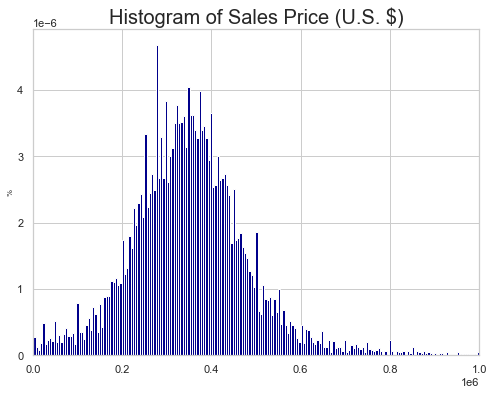

In [25]:
plt.figure(figsize=(8, 6))
plt.hist(sales['price'], bins=1000, density=True, color='darkblue')
plt.title('Histogram of Sales Price (U.S. $)', fontsize=20)
plt.ylabel('%', fontsize=8)
plt.xlim(0, 1000000)

Text(0, 0.5, 'U.S. %')

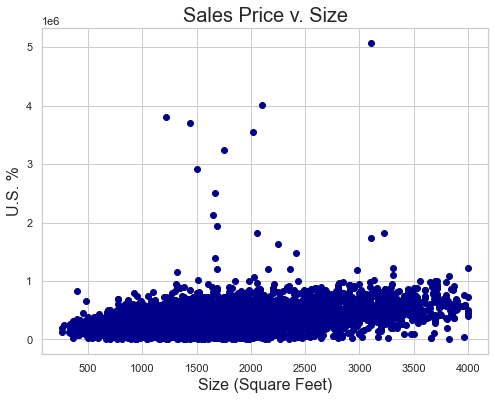

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(sales['gsf'], sales['price'], c='darkblue')
plt.title('Sales Price v. Size', fontsize=20)
plt.xlabel('Size (Square Feet)', fontsize=16)
plt.ylabel('U.S. %', fontsize=16)

### Accessing API-ed Data with Pandas

In [27]:
import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

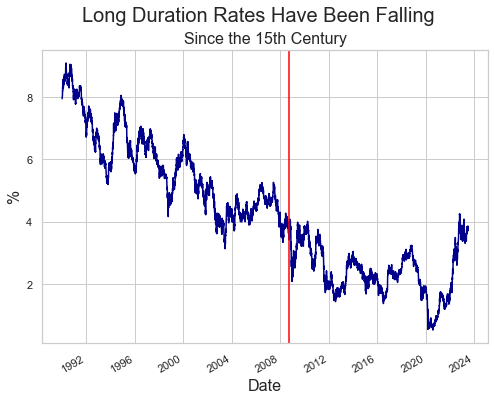

In [28]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01').dropna()
one_year = fred.get_series("DGS1", observation_start='1990-01-01').dropna()
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01').dropna()

ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('Since the 15th Century', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

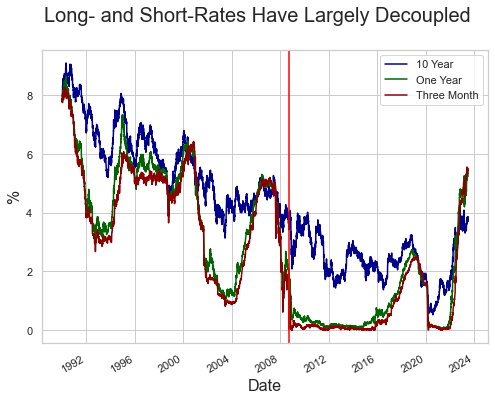

In [29]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
one_year.plot(c='darkgreen', label='One Year')
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axvline(dt.datetime(2008, 9, 15), color="red")

### Webscapping with Pandas 

In [30]:
url = "http://www2.census.gov/geo/docs/maps-data/data/gazetteer/census_tracts_list_36.txt"
names = ['geo', 'pop', 'hu', 'land', 'water', 'landSqmi', 'waterSqmi', 'lat', 'long']
data = pd.read_table(url, header = 0, names = names)

data['popDensity'] = data['pop'] / data['landSqmi']
data['houseDensity'] = data['hu'] / data['landSqmi']

data = data.dropna()

Text(0.5, 1.0, 'The Empire State from Census 2010')

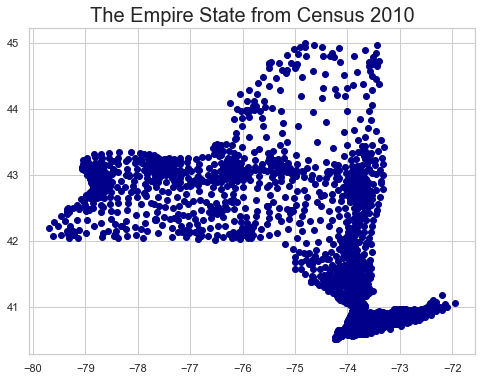

In [31]:
plt.figure(figsize = (8, 6))
plt.scatter(data['long'], data['lat'], c = 'darkblue')
plt.title('The Empire State from Census 2010', fontsize = 20)

Text(0.5, 1.0, 'Positive Correlation')

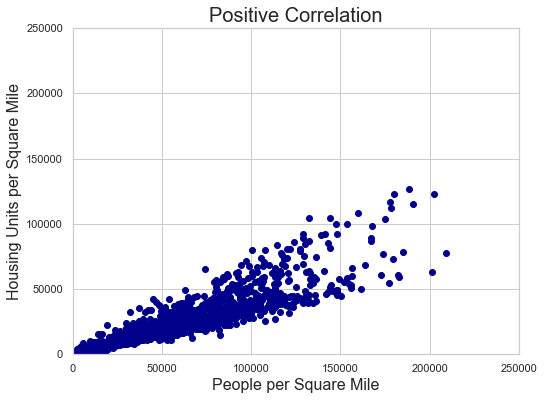

In [32]:
plt.figure(figsize =(8, 6))
plt.scatter(data['popDensity'], data['houseDensity'], c = 'darkblue')
plt.xlim([0, 250000])
plt.ylim([0, 250000])
plt.xlabel('People per Square Mile', fontsize=16)
plt.ylabel('Housing Units per Square Mile', fontsize=16)
plt.title('Positive Correlation', fontsize=20)

## Out of Sample (OOS) Prediction
* The **gold standard** of model performance is OOS prediction.
    * But if one uses **all of the data** in a regression, then OOS is not feasible.
    * Given the size of many of today's datasets, $10^6$, $10^9$ or $10^{12}$, it is possible to randomly split the data into a training set and a test set.
    * The algorithm is fitted on the training set and evalulated on the test set.  (We will see this below with logistic regression.)



* Discussion: **Out of sample** or **out of time**?

    
    
* **Suppose** you have a dataset with $n$ observations, where $n$ is **large**.
    * Ignore the discussion between sample and time.
    


* Consider the following idea.
    * **Randomly** split $n$ into a training set, $n_1$, and test set, $n_2$, $\ni n = n_1 + n_2$
    
    
    
* The algorithm is **trained** (or fitted or estimated) on $n_1$ but never sees $n_2$.



* The performance of the fitted algorithm to predict known outcomes in $n_2$ **is OOS prediction**.
    * If outcomes are **continuous**, you are a Wall Street trader testing your trading algo using back-testing.
    * If outcomes are **discrete**, you are working on fair-lending problems.



* What does "$n$ is large" mean?
    * Contextual.
    * If sufficiently large, apply the 80/20 rule to train/test splits.
    * What about standard errors?  Simulation only.



## The Bias-Variance Trade-Off and Cross Validation
* For any predictor, $\hat{y}$, of label, $y$, with a dataframe of size $N$, the MSE ${\displaystyle =\frac{1}{N}\sum_{i=1}^N(y_i - \hat{y_i})^2}$.



* In words, the MSE is the average of the **squared deviations** between our prediction and the truth.



* In practice, we do not much care about the overall MSE, but the MSE associated with the test set, in which case we simply limit the calculation to the test set.  



* It can be shown with some basic algebra that the MSE can be **decomposed**.  Namely,
    * MSE $\propto Var(\hat y) + Bias(\hat y)$


* **Prediction errors** are $\propto$ bias + variance
    * **Bias** arises as the result of erroneous assumptions regarding the learning algorithm, such as linearity. 
        * High bias can cause an algorithm to miss relevant relations between features and outcomes, called underfitting.
    * **Variance** arises as the result of sensitivity to small fluctuations in the training set. 
        * High variance may result from an algorithm modeling the random noise in the training data, called overfitting.
        
        
        
* Often our focus **is bias**, so we want to use train-test split of 80/20 or 90/10.  
        
        
        
* If a data set is very large, it is possible to use a technique called **k-fold cross validation**.
    * k-fold cross validation randomly splits the data into $k$ groups (or folds) of equal size. 
    * The first group becomes the test set and the remaning $k-1$ groups combined together become the train set. 
    * A model is is trained and built on the train set and is evaluated on the test set using some type of regression diagnostic. 
    * Repeat $k$ times where each time the train set and the test set end up being different. 
    * $k$ models are built and evaluated resulting in $k$ different diagnostics, whose average is the cross validation score.


    
* Practically, we might split our data into three parts: train, test and validation sets.

## An Algorithm: Logit, the Confusion Matrix and Area Under the ROC Curve (AUC)

### A Motivational Visualization

In [33]:
np.random.seed(12345)
red = np.random.multivariate_normal([-1, 1], [[1,0],[0,1]], 1000)
blue = np.random.multivariate_normal([1, -1], [[1,0],[0,1]], 1000)
arr = np.concatenate((red, blue), axis=0)

Text(0.5, 1.0, 'A Scatterplot of Continuous Outcomes')

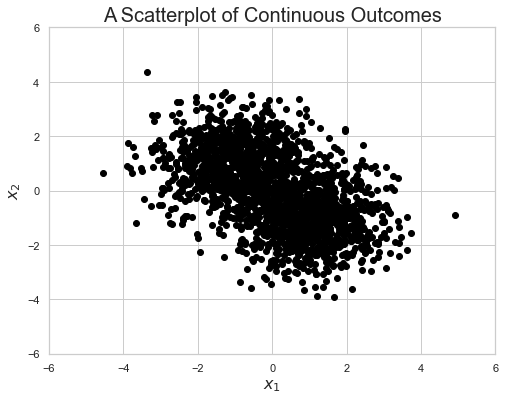

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(arr[0:999, 1], arr[0:999, 0], c="black")
plt.scatter(arr[1000:1999, 1],arr[1000:1999, 0], c="black")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'A Scatterplot of Continuous Outcomes', fontsize = 20)

Text(0.5, 1.0, 'A Scatterplot with Labels')

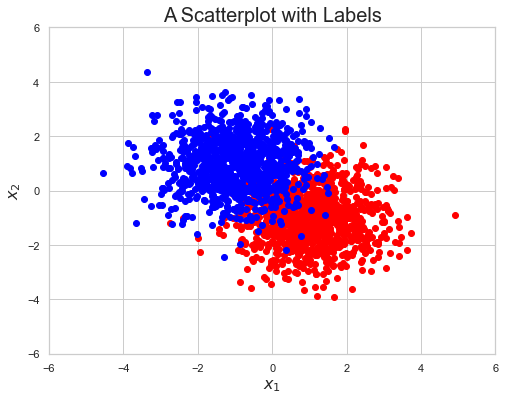

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(arr[0:999, 1], arr[0:999, 0], c="red")
plt.scatter(arr[1000:1999, 1],arr[1000:1999, 0], c="blue")
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'A Scatterplot with Labels', fontsize = 20)

### The Intellectual Motivation of the Logit: Latent Variables
* [Professor Daniel McFadden](https://en.wikipedia.org/wiki/Daniel_McFadden) poses a basic measurement question: suppose we only see the decisions individuals make?  In other words, revealed preference. 



* How do we consider this in the realm of economics?



* One can think of categorical variable as being driven by an underlying DGP.
    * As with time series, we do not observe the continuous process.
    * We observe realizations.



* Consider the following **Data Generating Proecess** (DGP): $y_i^*=x_i^\prime\beta+\epsilon_i$



* $y_i^*$ is a latent value for person *i* that is **unobserved by us**.  
    * For example, you do not observe the value I place on turning on the light.  
    * You simply observe that the lights are turn on.  
    * In other words, you observe the outcome {Off, On} or {0, 1}.  



* Another example would be observing someone taking a taxi.  
    * You do not observe the value that someone places on the taxi ride.  You know that she has many alternative methods of transportation, all with varying values to her, but you observe the outcome of her choice.



* $x_i$ are a vector of features (or attributes or predictors or independent variables) that we observe.



* $\beta$ is a vector that measures how features affect the latent index, which we will estimate as we did the FF factors. 



* $\epsilon_i$ retains its status as our ignorance.  



**What then do we observe?**



${\displaystyle d_i = }$
$\left\{ \begin{array}{l l} 
{1} & \quad \text{if person i takes a cab, which happens when } y_i^*\ge0\\ 
{0} & \quad \text{if person i does not take a cab, which happens when } y_i^*\lt0 \\
\end{array} \right.$  




### The Logit
* Start with a sample of size, $N$.  We are going to change the linear model to the following *representation*:



$Pr(d_i=1)=x_i^\prime\beta+\epsilon_i$



* We will then impose a distributional assumption on $\epsilon_i$, namely that it is logistically distributed.



${\displaystyle Pr(d_i=1) = \frac{\exp(x_i^\prime\beta)}{1+\exp(x_i^\prime\beta)}}$ 



* We see immediately that this is NOT **a linear model** (that is, a model that is linear in $\beta$).



${\displaystyle Pr(d_i=0) = 1 - Pr(d_i=1) = 1 - \frac{\exp(x_i^\prime\beta)}{1+\exp(x_i^\prime\beta)} = \frac{1}{1+\exp(x_i^\prime\beta)}}$



* An **odds ratio**:



${\displaystyle \frac{Pr(d_i=1)}{Pr(d_i=0)} = \frac{Pr(d_i=1)}{1 - Pr(d_i=1)} = \exp(x_i^\prime\beta)}$



* This implies that the log-odds ratio or **logit** is:



${\displaystyle \log\big(\frac{Pr(d_i=1)}{1 - Pr(d_i=1)}\big) = x_i^\prime\beta}$, which is linear in $\beta$.



* To address the estimation of the parameters of interest, we need to construct a likelihood function that the achine will optimize.  Start by constructing the likelihood for a single observation $i$:



* ${\displaystyle l_i = Pr(d_i=1)^{d_i}\cdot Pr(d_i=0)^{(1-d_i)}=\frac{\exp(x_i^\prime\beta)}{1+\exp(x_i^\prime\beta)}^{d_1}\frac{1}{1+\exp(x_i^\prime\beta)}^{(1-d_i)}}$



* If we make some assumptions we can write:



${\displaystyle L = \prod_{i=1}^N l_i = \prod_{i=1}^N \frac{\exp(x_i^\prime\beta)}{1+\exp(x_i^\prime\beta)}^{d_1}\frac{1}{1+\exp(x_i^\prime\beta)}^{(1-d_i)}}$



* Goal is to tell the machine to maximize $L$ with respect to $\beta$ given the data we have. 
    * Remember: representation, optimization and evaluation.



* Once we have done that, we can make probabilistic predictions (or classifications).

In [36]:
data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
data.describe()

,admit,gre,gpa,rank
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


#### Notes
* Admit is categorical: 0 is "Applicant Not Admitted", 1 is "Applicant Is Admitted".
* GRE is continuous measure of the applicant's Graduate Record Exam score.
* GPA is continuous measure of the applicant's Grade Point Average.
* Rank is the categorical ranking of the school the applicant attended as an undergraduate.

#### What Are We Going to Do?
* School rank is a categorical feature, and we should capture this aspect using C(rank).
* C(rank) tells statsmodels to convert the categorical variable into indicator variables and omit one of them.
* The omitted categorical indicator is the reference category, in this case the top ranked school.

In [37]:
mod = smf.logit(formula='admit ~ gre + gpa + C(rank)', data = data).fit()
print(mod.summary())

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 Jul 2023   Pseudo R-squ.:                 0.08292
Time:                        13:44:34   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.9900      1.140     -3.500      0.000      -6.224      -1.756
C(rank)[T.2]    -0.6754

In [38]:
marginal = mod.get_margeff()
print(marginal.summary())

        Logit Marginal Effects       
Dep. Variable:                  admit
Method:                          dydx
At:                           overall
                  dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
C(rank)[T.2]    -0.1314      0.060     -2.184      0.029      -0.249      -0.013
C(rank)[T.3]    -0.2608      0.062     -4.176      0.000      -0.383      -0.138
C(rank)[T.4]    -0.3019      0.076     -3.956      0.000      -0.451      -0.152
gre              0.0004      0.000      2.107      0.035    3.07e-05       0.001
gpa              0.1564      0.063      2.485      0.013       0.033       0.280


### Another Application to Introduce the Confusion Matrix: Spam

In [39]:
target_url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/"
              "spambase/spambase.data")
spam = pd.read_csv(target_url, header=None, prefix="v")

spam.rename(columns={'v57':'spam'}, inplace=True)
print (spam['spam'].head())
print (spam['spam'].tail())

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64
4596    0
4597    0
4598    0
4599    0
4600    0
Name: spam, dtype: int64


In [40]:
spam.describe()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v48,v49,v50,v51,v52,v53,v54,v55,v56,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [41]:
# Randomly split the dataframe as 2/3rds train and 1/3rd test.  
# Generate a uniform[0, 1] draw for every observation in the dataframe.  
# Flagging those observations with a uniform draw less than 1/3 identifies the test sample.  
# The remaining data would be the training sample.
# Why am I old fashioned?  Do it once by hand, and then do it with the code.
# For an alternative approach, see pandas.DataFrame.sample().

np.random.seed(12345)
spam['index'] = np.random.uniform(low = 0, high = 1, size = len(spam))
spam['test'] = pd.get_dummies(spam['index'] <= 0.3333)[1]

# We don't need the index, so drop it.
del spam['index']

# Now we can create new train and test dataframes.
# Note the format of these command lines.
# It basically resolves as create spamtest as a subset of spam when test is 1.
# Otherwise, it is train.
spamtest = spam[spam['test'] == 1]
spamtrain = spam[spam['test'] == 0]

# Confirm data has been split properly.
print(len(spamtrain))
print(len(spamtest))
print(len(spam))

3056
1545
4601


In [42]:
# Estimate the logit with the first five features.
# Note that Statsmodels generates the predicted values as an numpy array.  
# Create a variable in the spamtest dataframe equal to predicted values.

logit_mod = smf.logit('spam ~ v0 + v1 + v2 + v3 + v4', data = spamtrain).fit()
print()
print(logit_mod.summary())
pred = np.array(logit_mod.predict(spamtest))
spamtest['pred'] = logit_mod.predict(spamtest)

Optimization terminated successfully.
         Current function value: 0.608677
         Iterations 12

                           Logit Regression Results                           
Dep. Variable:                   spam   No. Observations:                 3056
Model:                          Logit   Df Residuals:                     3050
Method:                           MLE   Df Model:                            5
Date:                Sat, 01 Jul 2023   Pseudo R-squ.:                 0.09162
Time:                        13:44:39   Log-Likelihood:                -1860.1
converged:                       True   LL-Null:                       -2047.7
Covariance Type:            nonrobust   LLR p-value:                 6.441e-79
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0253      0.053    -19.426      0.000      -1.129      -0.922
v0             0.7213      

In [43]:
spamtest.head()

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v50,v51,v52,v53,v54,v55,v56,spam,test,pred
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.372,0.180,0.048,5.114,101,1028,1,1,0.405413
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.276,0.184,0.010,9.821,485,2259,1,1,0.652578
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.137,0.000,0.000,3.537,40,191,1,1,0.384723
12,0.00,0.69,0.34,0.0,0.34,0.00,0.00,0.00,0.00,0.00,...,0.0,0.786,0.000,0.000,3.728,61,261,1,1,0.381619
13,0.00,0.00,0.00,0.0,0.90,0.00,0.90,0.00,0.00,0.90,...,0.0,0.000,0.000,0.000,2.083,7,25,1,1,0.442416


### The Confusion Matrix

* With a logit predictor, you can correctly predict a 1 or correctly predict 0.
* Obviously, you can incorrectly predict a 1 or incorrectly predict a 0.
* This is the basis of the confusion matrix, together with other measures of **accuracy**.

In [44]:
from tabulate import tabulate
table = [[" ","0", "1"],["0", "TN", "FP"],["1", "FN", "TP"]]
print(tabulate(table, tablefmt="fancy_grid", numalign="center"))

╒═══╤════╤════╕
│   │ 0  │ 1  │
├───┼────┼────┤
│ 0 │ TN │ FP │
├───┼────┼────┤
│ 1 │ FN │ TP │
╘═══╧════╧════╛


* By **machine learning** canon:
    * Zeros are negatives, and ones are positives
    * Correctly predicting a 0 is a True Negative
    * Correctly predicting a 1 is a True Positive
    * Incorrectly predicting a 0 is a False Negative
    * Incorrectly predicting a 1 is a Fale Positive



* The True Positive Rate is TP / (TP + FN) and measures the rate of correctly classified spam emails



* The False Positive Rate is FP / (TN + FP) and measures the the rate of incorrectly classified spam emails



* The Accuary Rate is (TN + TP) / (TN + FP + FN + TP) and measures the overall accuracy rate of the classification algorithm

### The Discriminant Threshold: Human Instruct the Machine

In [45]:
threshold = 0.5
actual = spamtest['spam']
actual.astype(int)
prediction = np.zeros((len(spamtest),), dtype=np.int)
for i in range(len(prediction)): 
    if pred[i] > threshold: prediction[i] += 1

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [47]:
cm = confusion_matrix(actual, prediction)
MSE = mean_squared_error(actual, prediction)

TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
TPR = TP / (TP + FN)
FPR = FP / (TN + FP)
ACC = (TN + TP) / (TN + FP + FN + TP)

table = [[" ","0", "1"],["0", TN, FN],["1", FP, TP]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print()
print("The True Positive Rate is", TPR) 
print("The False Positive Rate is", FPR)
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤═════╤═════╕
│   │  0  │  1  │
├───┼─────┼─────┤
│ 0 │ 832 │ 408 │
├───┼─────┼─────┤
│ 1 │ 101 │ 204 │
╘═══╧═════╧═════╛

The True Positive Rate is 0.3333333333333333
The False Positive Rate is 0.1082529474812433
The Accuracy Rate is 0.6705501618122978
The Mean Squared Error is 0.3294498381877023


In [48]:
# Instead use as a threshold the incidence of spam in training set, ~39%.

threshold = spamtrain['spam'].describe()[1]
prediction = np.zeros((len(spamtest),), dtype=np.int)
for i in range(len(prediction)): 
    if pred[i] > threshold: prediction[i] += 1

cm = confusion_matrix(actual, prediction)
MSE = mean_squared_error(actual, prediction)

TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
TPR = TP / (TP + FN)
FPR = FP / (TN + FP)
ACC = (TN + TP) / (TN + FP + FN + TP)

table = [[" ","0", "1"],["0", TN, FN],["1", FP, TP]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print()
print("The True Positive Rate is", TPR) 
print("The False Positive Rate is", FPR)
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤═════╤═════╕
│   │  0  │  1  │
├───┼─────┼─────┤
│ 0 │ 733 │ 237 │
├───┼─────┼─────┤
│ 1 │ 200 │ 375 │
╘═══╧═════╧═════╛

The True Positive Rate is 0.6127450980392157
The False Positive Rate is 0.21436227224008575
The Accuracy Rate is 0.7171521035598706
The Mean Squared Error is 0.2828478964401295


#### Notes
* It is straightforward to automate the evaluation of TPR and FPR at a number of different thresholds.
* In signal processing, this is called the Receiver Operating Characteristic (ROC) Curve.
* The ROC Curve traces out two types of error as we vary the threshold discriminant value.
* The TPR is the sensitivity: the fraction of spam emails that are correctly identified, using a given threshold.
* The FPR is the fraction of non-spam emails that we classify incorrectly as spam at the same threshold.

In [49]:
def ROC(actual, pred, scores):
    
    tpr = np.zeros((len(scores),), dtype=np.float)
    fpr = np.zeros((len(scores),), dtype=np.float)
    acc = np.zeros((len(scores),), dtype=np.float)
    mse = np.zeros((len(scores),), dtype=np.float)
    
    for i in range(len(scores)):
        prediction = np.zeros((len(pred),), dtype=np.int)
        for j in range(len(prediction)):
            if pred[j] > scores[i]: prediction[j] += 1
                
        cm = confusion_matrix(actual, prediction)
        ms = mean_squared_error(actual, prediction)
        TN, FP, FN, TP = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
        tpr[i] = TP/(TP + FN)
        fpr[i] = FP/(TN + FP)
        acc[i] = (TN + TP) / (TN + FP + FN + TP)
        mse[i] = ms
    
    return tpr, fpr, acc, mse

scores = np.arange(0, 1, .05)

TPR, FPR, ACC, mse = ROC(actual, pred, scores)

Text(0.5, 1.0, 'AUC')

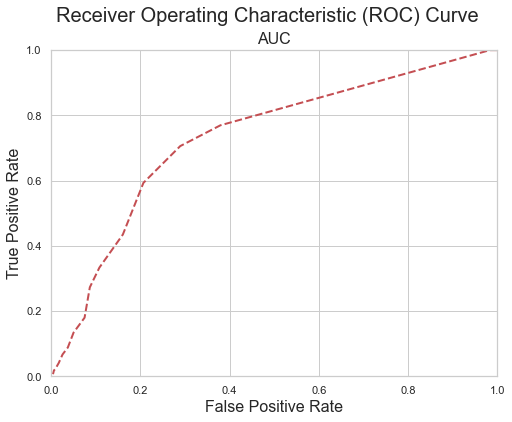

In [50]:
plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, 'r--', lw=2)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.suptitle('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.title('AUC', fontsize=16)

#### Notes
* The ideal ROC curve hugs the top left corner, indicating a high TPR and a low FPR.
* The AUC is just the integral under the ROC curve.  If it hugs, the integral is large.
* What would a 45-degree line represent?
    * A 45-degree line would represent the “no information” classifier.
    * Our features cannot predict whether or not an email is spam.
    * Basically we flip a coin: heads = spam.

Text(0.5, 1.0, 'Accuracy Rates')

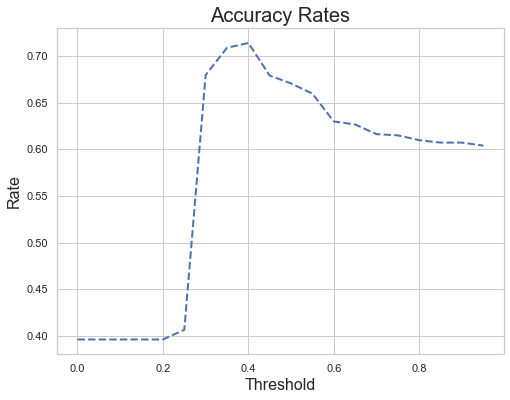

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(scores, ACC, 'b--', lw=2)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('Rate', fontsize=16)
plt.title('Accuracy Rates', fontsize=20)

Text(0.5, 1.0, 'MSE')

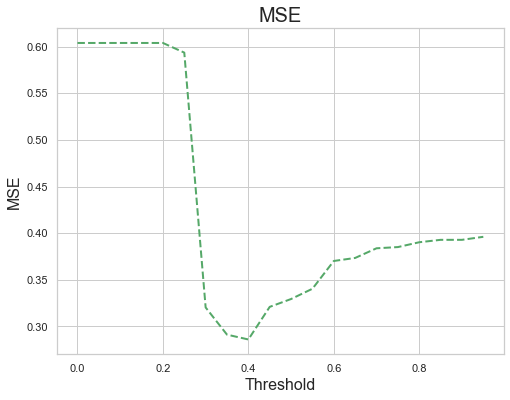

In [52]:
plt.figure(figsize = (8, 6))
plt.plot(scores, mse, 'g--', lw=2)
plt.xlabel('Threshold', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.title('MSE', fontsize=20)

## Decision Trees

* **Decision trees** are a different approach to analytics from linear or logistic regression.
    * The mantra: **divide and conquer**.



* Decision trees split the feature space to separate labels (or outcomes). 
    * A decision tree is similar to calling your bank and getting the automated teller, which asks whether:
        * you are calling about a commercial or residential account?
        * conditional on your answer, a checking or savings account?



* A decision tree works in the identical manner by partitioning the feature space. 



* The graphics below show the idea behind decision trees.
    * Start by splitting the feature space at x1 = 0. 
    
    
    
* The current implimentation of decision tress is the random forest, addressed later in the course.

In [53]:
np.random.seed(12345)
red = np.random.multivariate_normal([-1, 1], [[1,0],[0,1]], 1000)
blue = np.random.multivariate_normal([1, -1], [[1,0],[0,1]], 1000)
green = np.random.multivariate_normal([-2, -2], [[1,0],[0,1]], 1000)
y1 = np.zeros((len(red),), dtype=np.int) + 1
y2 = np.zeros((len(blue),), dtype=np.int) + 2
y3 = np.zeros((len(green),), dtype=np.int) + 3
y = np.append(y1, y2, axis=0)
y = np.append(y, y3, axis=0)
X = np.append(red, blue, axis=0)
X = np.append(X, green, axis=0)

Text(0.5, 1.0, 'A Scatterplot with Three Labels')

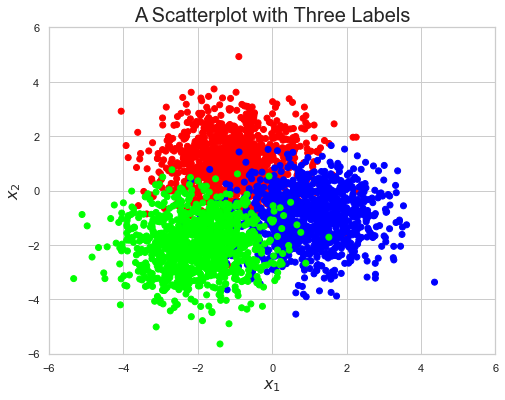

In [54]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = ListedColormap(['#FF0000', '#0000FF', '#00FF00']))
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'A Scatterplot with Three Labels', fontsize = 20)

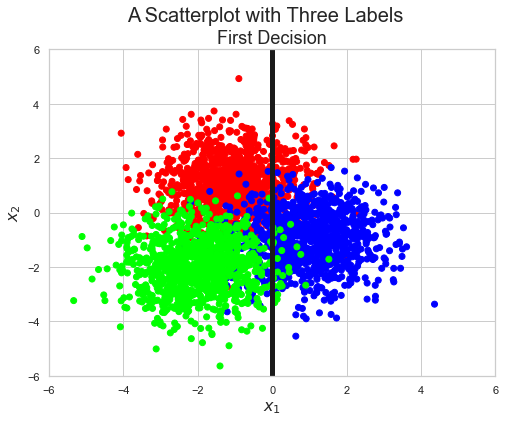

In [55]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = ListedColormap(['#FF0000', '#0000FF', '#00FF00']))
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.suptitle(r'A Scatterplot with Three Labels', fontsize = 20)
plt.title(r'First Decision', fontsize = 18)
plt.axvline(x=0, linewidth=5, color='k')

#### Notes
* The first tree is based on $x_1$ and whether it is positive or negative.



* It splits the feature space in a manner that highlights the likelihood of blue is $x_1 > 0$

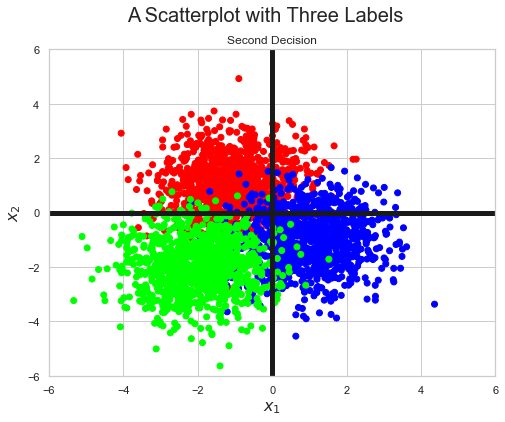

In [56]:
plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap = ListedColormap(['#FF0000', '#0000FF', '#00FF00']))
plt.xlim(-6, 6)
plt.ylim(-6, 6)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.suptitle(r'A Scatterplot with Three Labels', fontsize = 20)
plt.title(r'Second Decision')
plt.axvline(x=0, linewidth=5, color='k')
plt.axhline(y=0, linewidth=5, color='k')

#### Notes
* The second tree is based on $x_2$ and whether it is positive or negative.
* It splits the feature space in a manner that highlights:
    * the likelihood of blue is $x_1 > 0$ and $x_2 < 0$
    * the likelihood of green is $x_1 < 0$ and $x_2 < 0$
    * the likelihood of red is $x_1 < 0$ and $x_2 > 0$
    * the likelihood of the northwest orthant is vague

## Comparison to Regression
* Fundamental trade-off is interpretability.  



* Linear regression is old and stable.  (Theory is 18th C and implementation is 19th C.)
    * It generates point estimates that are easily understood.
    * It facilitates traditional hypothesis testing (even though the approach is flawed).
    * But you are not going to build self-driving cars using linear regression.
    
    
    
* Newer techniques such as Random Forests or XGBoost have more power OOS, but we lose the ability to interpret the results.
    * Why split here or there?  
    * An objective function that is maximized but faces multiple local optima with no reason to believe there is a global optimum.
    * Not a "$M^3$ estimator".
    * But they better approximate non-linear relationships: $y = f(x)$ rather than $y = \beta \cdot x$.

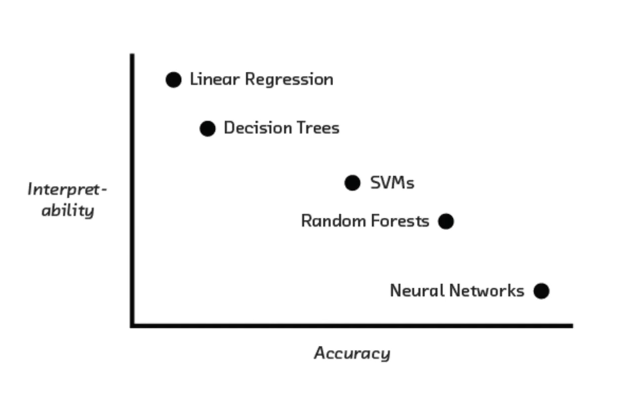

In [57]:
from IPython.display import Image
url = 'https://raw.githubusercontent.com/cog-data/ML_Interpretability_tutorial/master/img/accuracy_interpretability.png'
Image(url, width=600, height=600)

## XGBoost and Terminology
* XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.



* XGBoost stands for e**x**treme **g**radient **boost**ing.



* Typically, ensemble algorithms perform better than individual algorithms. 
    * An ensemble averages different fitted learners into a single learner. 
    * Random forests are popular ensembles that take the average of many decision trees via **bagging** or **bootstrap aggregation**: samples are chosen with replacement (**bootstrapping**) and combined (**aggregated**) by taking their average.
    * Hence bagging.



* **Boosting** is an alternative to **bagging**. 
    * Instead of aggregating predictions, boosters turn weak algorithms into strong algorithms by addressing where the individual algorithms (usually decision trees) failed in prediction. 
    * In contrast, for gradient boosting, individual algorithms train on residuals, which are the difference between the prediction $\hat y$ and the truth, $y$. 
    * Instead of aggregating trees, gradient boosted trees learn from errors during each boosting round.
    
    

### Important Hyperparameters for XGBoost in SciKit Learn
* n_estimators: the number of trees to construct



* learning_rate: the contribution of each tree, scaled $\ni$ a low value indicates a low contribution per tree



* max_depth: the maximum depth of each tree

### An Open-Source Use Case

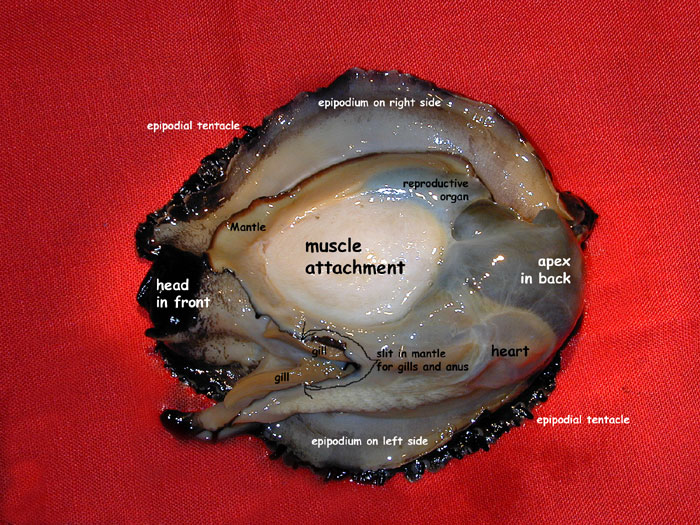

In [58]:
from IPython.display import Image
url = "http://www.marinebio.net/marinescience/06future/abimg/aa3770.jpg"
Image(url, width=500, height=500)

In [59]:
target_url = ("http://archive.ics.uci.edu/ml/machine-"
              "learning-databases/abalone/abalone.data")

# Read abalone data from UCI repository.
abalone = pd.read_csv(target_url, header=None, prefix="v")
abalone.columns = ['Gender', 'Length', 'Diameter', 'Height', 'Whole Weight',
                   'Shucked Weight', 'Viscera Weight', 'Shell Weight',
                   'Rings']

# Gender is a alpha character rather than a numeric label.  Create a numeric label {1, 2, 3} for Gender
# to pass to various machine learning predictors.
abalone['Ind'] = np.zeros((len(abalone),), dtype=np.int) + 1
for i in range(len(abalone)):
    if abalone['Gender'][i]=='I': abalone['Ind'][i] += 1
    if abalone['Gender'][i]=='M': abalone['Ind'][i] += 2

# Note the use of pandas get_dummies, which cleaves off the [0, 1] from the logical expression.
np.random.seed(12345)
abalone['index'] = np.random.uniform(low = 0, high = 1, size = len(abalone))
abalone['test'] = pd.get_dummies(abalone['index'] <= 0.2)[1]

# We don't need the index, so drop it.
del abalone['index']

# Now we can create new train and test dataframes.
# Note the format of these command lines.
# It basically resolves as create spamtest as a subset of spam when test is 1.
# Otherwise, it is train.
abalonetest = abalone[abalone['test'] == 1]
abalonetrain = abalone[abalone['test'] == 0]

# Confirm data has been split properly.
print(len(abalonetrain))
print(len(abalonetest))
print(len(abalone))

3355
822
4177


In [60]:
ytrain = abalonetrain['Ind'].to_numpy()
ytest = abalonetest['Ind'].to_numpy()

Xtrain = abalonetrain[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 
             'Viscera Weight', 'Shell Weight', 'Rings']].to_numpy()
Xtest = abalonetest[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 
             'Viscera Weight', 'Shell Weight', 'Rings']].to_numpy()

In [61]:
# Start with one tree.
from sklearn import ensemble
clf = ensemble.GradientBoostingClassifier(n_estimators=1, learning_rate=0.1, random_state=0)

clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

In [62]:
MSE = mean_squared_error(ytest, ypred)

cm = confusion_matrix(ytest, ypred)

ACC = (cm[0][0] + cm[1][1] +cm[2][2]) / (len(ypred))

table = [[" ","1", "2", "3"],
         ["1", cm[0][0], cm[0][1], cm[0][2]], 
         ["2", cm[1][0], cm[1][1], cm[1][2]], 
         ["3", cm[2][0], cm[2][1], cm[2][2]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤═══╤═════╤═════╕
│   │ 1 │  2  │  3  │
├───┼───┼─────┼─────┤
│ 1 │ 0 │  6  │ 263 │
├───┼───┼─────┼─────┤
│ 2 │ 0 │ 146 │ 129 │
├───┼───┼─────┼─────┤
│ 3 │ 0 │ 26  │ 252 │
╘═══╧═══╧═════╧═════╛
The Accuracy Rate is 0.48418491484184917
The Mean Squared Error is 1.475669099756691


In [63]:
# Now go to 10 trees.
clf = ensemble.GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=0)

clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

In [64]:
MSE = mean_squared_error(ytest, ypred)

cm = confusion_matrix(ytest, ypred)

ACC = (cm[0][0] + cm[1][1] +cm[2][2]) / (len(ypred))

table = [[" ","1", "2", "3"],
         ["1", cm[0][0], cm[0][1], cm[0][2]], 
         ["2", cm[1][0], cm[1][1], cm[1][2]], 
         ["3", cm[2][0], cm[2][1], cm[2][2]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤════╤═════╤═════╕
│   │ 1  │  2  │  3  │
├───┼────┼─────┼─────┤
│ 1 │ 54 │ 34  │ 181 │
├───┼────┼─────┼─────┤
│ 2 │ 13 │ 222 │ 40  │
├───┼────┼─────┼─────┤
│ 3 │ 28 │ 54  │ 196 │
╘═══╧════╧═════╧═════╛
The Accuracy Rate is 0.5742092457420924
The Mean Squared Error is 1.1885644768856447


#### Notes
* Substantial improvement in accuracy by increasing the number of trees to 10.  
* Improved classification of types 1 and 2, but decreased accuracy of classification of type 3.
* XGBoost has an accuracy of 574 bps without computation expense on the margin.
    * What is $10^9$ times 33 bps?

In [65]:
# Now go to 100 trees.

clf = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)

clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

In [66]:
MSE = mean_squared_error(ytest, ypred)

cm = confusion_matrix(ytest, ypred)

ACC = (cm[0][0] + cm[1][1] +cm[2][2]) / (len(ypred))

table = [[" ","1", "2", "3"],
         ["1", cm[0][0], cm[0][1], cm[0][2]], 
         ["2", cm[1][0], cm[1][1], cm[1][2]], 
         ["3", cm[2][0], cm[2][1], cm[2][2]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤════╤═════╤═════╕
│   │ 1  │  2  │  3  │
├───┼────┼─────┼─────┤
│ 1 │ 74 │ 36  │ 159 │
├───┼────┼─────┼─────┤
│ 2 │ 18 │ 231 │ 26  │
├───┼────┼─────┼─────┤
│ 3 │ 64 │ 59  │ 155 │
╘═══╧════╧═════╧═════╛
The Accuracy Rate is 0.559610705596107
The Mean Squared Error is 1.254257907542579


In [67]:
# 10 trees but increase the number of features used per tree.

clf = ensemble.GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_features=4, random_state=0)

clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

In [68]:
MSE = mean_squared_error(ytest, ypred)

cm = confusion_matrix(ytest, ypred)

ACC = (cm[0][0] + cm[1][1] +cm[2][2]) / (len(ypred))

table = [[" ","1", "2", "3"],
         ["1", cm[0][0], cm[0][1], cm[0][2]], 
         ["2", cm[1][0], cm[1][1], cm[1][2]], 
         ["3", cm[2][0], cm[2][1], cm[2][2]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤════╤═════╤═════╕
│   │ 1  │  2  │  3  │
├───┼────┼─────┼─────┤
│ 1 │ 17 │ 37  │ 215 │
├───┼────┼─────┼─────┤
│ 2 │ 8  │ 225 │ 42  │
├───┼────┼─────┼─────┤
│ 3 │ 11 │ 53  │ 214 │
╘═══╧════╧═════╧═════╛
The Accuracy Rate is 0.5547445255474452
The Mean Squared Error is 1.27007299270073


In [69]:
# 100 trees and four features

clf = ensemble.GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_features=4, random_state=0)

clf.fit(Xtrain, ytrain)

ypred = clf.predict(Xtest)

In [70]:
MSE = mean_squared_error(ytest, ypred)

cm = confusion_matrix(ytest, ypred)

ACC = (cm[0][0] + cm[1][1] +cm[2][2]) / (len(ypred))

table = [[" ","1", "2", "3"],
         ["1", cm[0][0], cm[0][1], cm[0][2]], 
         ["2", cm[1][0], cm[1][1], cm[1][2]], 
         ["3", cm[2][0], cm[2][1], cm[2][2]]]
print("The confusion matrix is:")
print(tabulate(table, tablefmt="fancy_grid", numalign = "center"))
print("The Accuracy Rate is", ACC)
print("The Mean Squared Error is", MSE)

The confusion matrix is:
╒═══╤════╤═════╤═════╕
│   │ 1  │  2  │  3  │
├───┼────┼─────┼─────┤
│ 1 │ 80 │ 40  │ 149 │
├───┼────┼─────┼─────┤
│ 2 │ 15 │ 229 │ 31  │
├───┼────┼─────┼─────┤
│ 3 │ 66 │ 62  │ 150 │
╘═══╧════╧═════╧═════╛
The Accuracy Rate is 0.5583941605839416
The Mean Squared Error is 1.2262773722627738


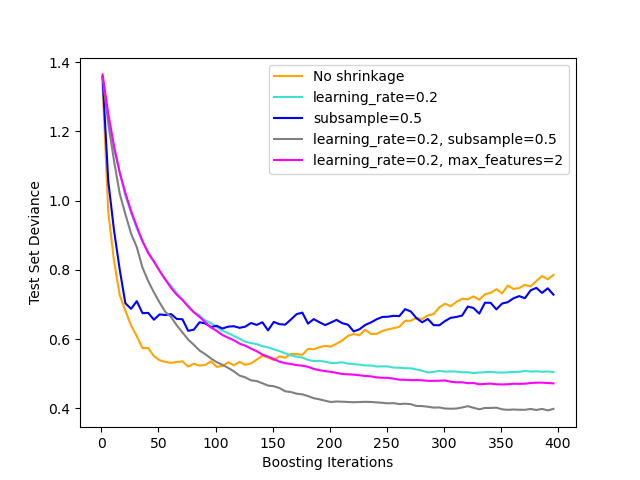

In [71]:
from IPython.display import Image
url = 'https://scikit-learn.org/stable/_images/sphx_glr_plot_gradient_boosting_regularization_001.png'
Image(url, width=800, height=800)

## Why Does This Matter? 
* Consider the following measure of firm profits of a lender: $\Pi = R(L) - C(L)$
    * Revenues and costs are driven by the number of loans, $L$, orginated in a competitive lending market where no firm can exercise market power and ignores the activity of its competitors.  
    * $R'(L) \ge 0$ and $C'(L) \le 0$ 
    * Ideally, a lender finds the optimal number of loans, $L^*$, by equating $R'(L)$ and $C'(L)$.
        * The lender knows only a limited amount of information about the borrower and the risk of lending, which drives lending costs, $C(L)$.
        * As a result, the lender uses an algorithm (or model) to determine the number of loans, $\hat L$, that it should originate, called the baseline, which might be a coin flip with an accuracy of 50%.  
    * **To the extent that $L^* < \hat L$, the firm is foregoing profitable lending**.  
    * CRA is retained (at no expense) to develop a new algorithm to improve lending decisions.
        * The new algorithm has an accuracy of 80%, thus increasing the number of loans originated and profits.
        
        
        
* This simple example can be improved in several ways, but the point is clear: improved algorithm (or model) accuracy increases profits.
    * How to improve?
        * Include the ideas discussed in class.
            * Baseline might not be 50% but a prior model.
            * Use a train/test/validation approach, in which the validation sample is only used once to assess model quality.
            * Use "swap in/swap out" analysis to determine the opportunity costs (in both directions) of model accuracy.
            * Make some assumptions about profitability and risk that inform $R(L)$ and $C(L)$. 



* It then becomes possible to make the following statement (depending on your audience):
    * C-Suite: Our model is better than yours and increases total profits by X dollars.
    * Modelers: Our model is fully documented.  For every basis point improvement in accuracy, your profits increase by Y dollars (accounting for both revenue and loss severity), and we improved your model's accuracy by Z bps.  Now let's look at some Shapely plots. 

## If Interested: A Brief Introduction to Neural Networks

In [72]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.datasets import mnist

from PIL import Image
import urllib.request as url
import io
from IPython.display import Image

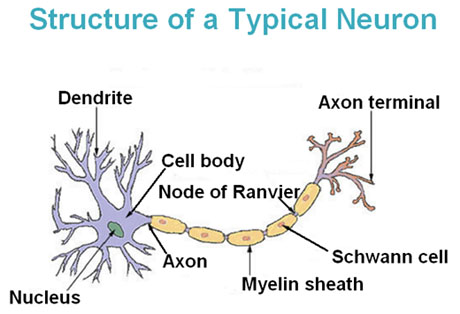

In [73]:
from IPython.display import Image
url = "https://upload.wikimedia.org/wikipedia/commons/b/bd/Neuron.jpg"
Image(url, width=400, height=400)

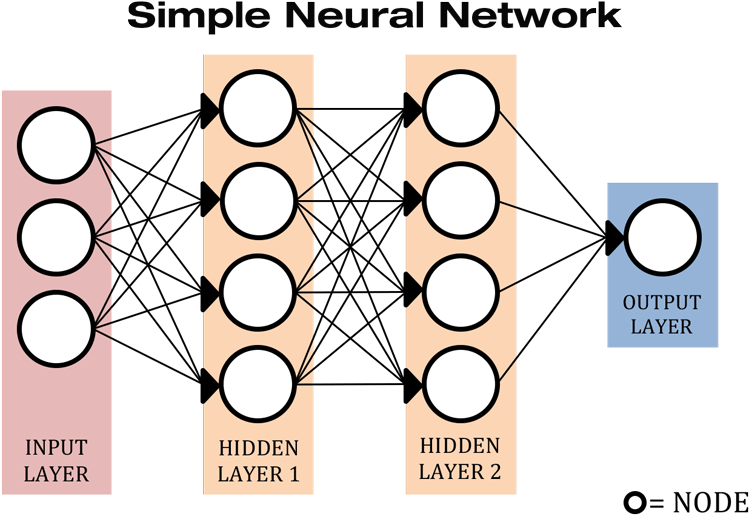

In [74]:
url = 'https://www.seekpng.com/png/full/556-5560946_here-is-an-example-of-a-very-simple.png'
Image(url, width=400, height=400)

### Overview
* Because of their remarkable success in digital image processing, among other areas of data science, the origin of neural networks, the precusor to deep learning, is claimed by many disciplines and by many people.



* The "electronic brain" and the neuroscience of the 1950's.
    * Computer science: Character recongition and the U.S. Postal Service.
    * Economics and finance: Let's make a million dollars!
    * Like many approaches in data science, the technique has waxed and waned through the ages, seemingly rediscovered each time.



* Let's not focus on the past (despite my personal interest on the origin of algorithms). Let's focus on the present. Fortunately, we've already seen a simple example of a neural network: the logit classifier (reviewed above).



* The logit classifier is a simple neural network: feed-forward MLP with one hidden layer.
    * A neural network builds on this simple concept by introducing many "logits" and tying them together with weights.
    * We estimated the $\beta$'s of the logits via maximum likelihood.
    * We tie them with weights that we also esimate via maximum likelihood.

### Computer science

Character recongition, the U.S. Postal Service, and Yann LeCun's famous MNIST data.
A Cambrian-like explosion since 2008.

### Economics and finance
See, among others, papers by Ron Gallant (UNC Chapel Hill), Timothy Savage (NYU), George Tauchen (Duke), and Hal White (UCSD).

### A Motivating Example: The Logic Gate

In [75]:
np.random.seed(1907)
f1 = np.random.randint(0, 2, 10000)
f2 = np.random.randint(0, 2, 10000)
label = np.logical_xor(f1, f2) * 1
data = pd.DataFrame({'label':label, 'f1':f1, 'f2':f2})
data.head(10)

,label,f1,f2
0,0,1,1
1,1,1,0
2,0,1,1
3,0,0,0
4,0,1,1
5,1,1,0
6,0,1,1
7,0,0,0
8,0,0,0
9,1,1,0


### Notes
* A simple data structure that is difficult to analyze using our algorithms to date.
* The train/test split is a different method to evaluate the performance of an algorithm.
    * Randomly split the whole dataset into two parts.
    * Fit the algorithm on the training dataset.
    * Evaluate the performance of the algorithm on the test dataset using the MSE criterion.

In [76]:
from sklearn.model_selection import train_test_split
datatrain, datatest = train_test_split(data, test_size = 0.2, random_state = 6281993)

In [77]:
# The logit algorithm.
# Generate predictions for the test data based on the results of the algorithm fit on the training data.

mod = smf.logit(formula='label ~ f1 + f2', data = datatrain).fit()
print(mod.summary())
datatest['logit_hat'] = mod.predict(exog = datatest)

Optimization terminated successfully.
         Current function value: 0.692937
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7997
Method:                           MLE   Df Model:                            2
Date:                Sat, 01 Jul 2023   Pseudo R-squ.:               0.0001723
Time:                        13:45:04   Log-Likelihood:                -5543.5
converged:                       True   LL-Null:                       -5544.4
Covariance Type:            nonrobust   LLR p-value:                    0.3846
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0337      0.039      0.866      0.386      -0.043       0.110
f1            -0.0500      0.

In [78]:
print("The MSE is %f" % mean_squared_error(datatest['label'], datatest['logit_hat']))

The MSE is 0.250073


In [79]:
print(datatest.head(20))

      label  f1  f2  logit_hat
2803      1   0   1   0.517343
5397      1   0   1   0.517343
1739      0   1   1   0.504839
5103      1   0   1   0.517343
3750      0   0   0   0.508434
1654      1   1   0   0.495924
3057      1   1   0   0.495924
8124      0   0   0   0.508434
6477      0   0   0   0.508434
6597      1   1   0   0.495924
8399      1   1   0   0.495924
494       0   1   1   0.504839
4775      1   1   0   0.495924
3787      0   0   0   0.508434
7204      0   0   0   0.508434
1951      1   0   1   0.517343
2198      1   1   0   0.495924
4699      0   0   0   0.508434
2602      1   0   1   0.517343
6044      1   1   0   0.495924


#### Notes 
* Note that both algortithms perform poorly.
* Easy to impliment, but they cannot "fit" the logit gate.
* Hence, the development of neural networks, the precusor to deep learning.

In [80]:
X_train = datatrain[['f1', 'f2']].values
y_train = datatrain['label'].values
X_test = datatest[['f1', 'f2']].values
y_test = datatest['label'].values
dim = X_train.shape[1]

In [81]:
# This the simplest neural network, the multilayer perceptron with one hidden layer.

np.random.seed(1066)

model = keras.Sequential([
    keras.layers.Dense(1, activation='relu', input_dim=dim),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
datatest['dl_hat'] = model.predict(X_test)

Epoch 1/10
40/40 - 1s - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 2/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 3/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 4/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 5/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 6/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 7/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 8/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 9/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.4995
Epoch 10/10
40/40 - 0s - loss: 0.6931 - accuracy: 0.5067 - val_loss: 0.6933 - val_accuracy: 0.4995


In [82]:
print("The MSE is %f" % mean_squared_error(datatest['label'], datatest['dl_hat']))

The MSE is 0.250055


### Notes
* The hidden layer improves the performance of the model only modestly.
* Let's continue to add hidden perceptrons, as well as additional layers.

In [83]:
np.random.seed(1066)

model = keras.Sequential([
    keras.layers.Dense(5, activation='relu', input_dim=dim),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
datatest['dl_hat'] = model.predict(X_test)

Epoch 1/10
40/40 - 1s - loss: 0.7200 - accuracy: 0.7461 - val_loss: 0.7062 - val_accuracy: 0.7495
Epoch 2/10
40/40 - 0s - loss: 0.6883 - accuracy: 0.7525 - val_loss: 0.6769 - val_accuracy: 0.7495
Epoch 3/10
40/40 - 0s - loss: 0.6630 - accuracy: 0.7525 - val_loss: 0.6547 - val_accuracy: 0.7495
Epoch 4/10
40/40 - 0s - loss: 0.6450 - accuracy: 0.7525 - val_loss: 0.6383 - val_accuracy: 0.7495
Epoch 5/10
40/40 - 0s - loss: 0.6304 - accuracy: 0.7525 - val_loss: 0.6244 - val_accuracy: 0.7495
Epoch 6/10
40/40 - 0s - loss: 0.6174 - accuracy: 0.7525 - val_loss: 0.6113 - val_accuracy: 0.7495
Epoch 7/10
40/40 - 0s - loss: 0.6050 - accuracy: 0.7525 - val_loss: 0.5989 - val_accuracy: 0.7495
Epoch 8/10
40/40 - 0s - loss: 0.5929 - accuracy: 0.9819 - val_loss: 0.5866 - val_accuracy: 1.0000
Epoch 9/10
40/40 - 0s - loss: 0.5808 - accuracy: 1.0000 - val_loss: 0.5744 - val_accuracy: 1.0000
Epoch 10/10
40/40 - 0s - loss: 0.5687 - accuracy: 1.0000 - val_loss: 0.5620 - val_accuracy: 1.0000


In [84]:
print("The MSE is %f" % mean_squared_error(datatest['label'], datatest['dl_hat']))

The MSE is 0.185256


In [85]:
print(datatest.head(20))

      label  f1  f2  logit_hat    dl_hat
2803      1   0   1   0.517343  0.537319
5397      1   0   1   0.517343  0.537319
1739      0   1   1   0.504839  0.459350
5103      1   0   1   0.517343  0.537319
3750      0   0   0   0.508434  0.424330
1654      1   1   0   0.495924  0.632212
3057      1   1   0   0.495924  0.632212
8124      0   0   0   0.508434  0.424330
6477      0   0   0   0.508434  0.424330
6597      1   1   0   0.495924  0.632212
8399      1   1   0   0.495924  0.632212
494       0   1   1   0.504839  0.459350
4775      1   1   0   0.495924  0.632212
3787      0   0   0   0.508434  0.424330
7204      0   0   0   0.508434  0.424330
1951      1   0   1   0.517343  0.537319
2198      1   1   0   0.495924  0.632212
4699      0   0   0   0.508434  0.424330
2602      1   0   1   0.517343  0.537319
6044      1   1   0   0.495924  0.632212


In [86]:
np.random.seed(1066)

model = keras.Sequential([
    keras.layers.Dense(5, activation='relu', input_dim=dim),
    keras.layers.Dense(25, activation='relu', input_dim=dim),
    keras.layers.Dense(25, activation='relu', input_dim=dim),
    keras.layers.Dense(25, activation='relu', input_dim=dim),    
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
datatest['dl_hat'] = model.predict(X_test)

Epoch 1/10
40/40 - 1s - loss: 0.6145 - accuracy: 0.8404 - val_loss: 0.5433 - val_accuracy: 1.0000
Epoch 2/10
40/40 - 0s - loss: 0.4382 - accuracy: 1.0000 - val_loss: 0.3151 - val_accuracy: 1.0000
Epoch 3/10
40/40 - 0s - loss: 0.1936 - accuracy: 1.0000 - val_loss: 0.0991 - val_accuracy: 1.0000
Epoch 4/10
40/40 - 0s - loss: 0.0565 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 5/10
40/40 - 0s - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 6/10
40/40 - 0s - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 7/10
40/40 - 0s - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 8/10
40/40 - 0s - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 9/10
40/40 - 0s - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 10/10
40/40 - 0s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 9.8682e-04 - val_accuracy: 1.0000


In [87]:
print("The MSE is %f" % mean_squared_error(datatest['label'], datatest['dl_hat']))

The MSE is 0.000002


In [88]:
print(datatest.head(20))

      label  f1  f2  logit_hat    dl_hat
2803      1   0   1   0.517343  0.999667
5397      1   0   1   0.517343  0.999667
1739      0   1   1   0.504839  0.000226
5103      1   0   1   0.517343  0.999667
3750      0   0   0   0.508434  0.002796
1654      1   1   0   0.495924  0.999409
3057      1   1   0   0.495924  0.999409
8124      0   0   0   0.508434  0.002796
6477      0   0   0   0.508434  0.002796
6597      1   1   0   0.495924  0.999409
8399      1   1   0   0.495924  0.999409
494       0   1   1   0.504839  0.000226
4775      1   1   0   0.495924  0.999409
3787      0   0   0   0.508434  0.002796
7204      0   0   0   0.508434  0.002796
1951      1   0   1   0.517343  0.999667
2198      1   1   0   0.495924  0.999409
4699      0   0   0   0.508434  0.002796
2602      1   0   1   0.517343  0.999667
6044      1   1   0   0.495924  0.999409


### Notes
* The MLP improves the performance of the algorithm considerably.
* It can be implemented with little computational burden.

In [89]:
!jupyter nbconvert --to script "CRA Course Day 1.ipynb"

[NbConvertApp] Converting notebook CRA Course Day 1.ipynb to script
[NbConvertApp] Writing 53532 bytes to CRA Course Day 1.py
